## 1. Connexion à la base de données

In [7]:
import pandas as pd
import database
import matplotlib.pyplot as plt
import seaborn as sns

df = database.main()
df.drop_duplicates(keep='first', inplace=True)
df.head()

,title,company,description,location,via,extensions,employment_type,work_mode,posting_date,degree_requirement,salary,posted_at_timestamp
0,Data Analyst internship,PGBPGNGLOBAL,,"Paris, France",via PG Careers,"{""Full-time and Internship""}",Full-time and Internship,None,None,None,None,NaT
1,Senior Data Analyst H/F,Qonto,Les missions du poste\n\nOur mission? Making d...,Anywhere,via HelloWork,"{""9 hours ago"",""Work from home"",Full-time,""9 h...",Full-time,Work from home,9 hours ago,None,None,2024-02-13 01:54:19.019501
2,Data Analyst,Jump,"Pour relever ces défis, nous recrutons un·e Da...","Paris, France",via Welcome To The Jungle,"{""18 hours ago"",Full-time,""18 hours ago"",Full-...",Full-time,None,18 hours ago,None,None,2024-02-12 16:54:19.019501
3,Data analyst,Oh BiBi,Job Description:\n\nAs a Data Analyst at OhBiB...,"Paris, France",via Indeed,"{""4 days ago"",Full-time,""4 days ago"",Full-time}",Full-time,None,4 days ago,None,None,2024-02-09 10:54:19.019501
4,Product Data Analyst,leboncoin,"The right career for all\n\nCreated in 2006, l...","Paris, France",via LinkedIn,"{""24 hours ago"",Full-time,""No degree mentioned...",Full-time,None,24 hours ago,No degree mentioned,None,2024-02-12 10:54:19.019501


## 2. Standardisation des salaires

In [8]:
import re

# Function to parse and standardize salary
def standardize_salary(salary):
    if salary is None:
        return None
    
    # Find all numbers in the salary string
    numbers = [float(num.replace('K', '000')) for num in re.findall(r'[\d.]+K?|[\d,]+', salary.replace(',', ''))]
    
    # Determine the salary period and calculate annual salary
    if 'a month' in salary:
        annual_salary = int(sum(numbers) / len(numbers) * 12) # Average if a range, then convert to annual
    elif 'a day' in salary:
        annual_salary = int(sum(numbers) / len(numbers) * 220)  # Average if a range, then convert to annual
    elif 'a year' in salary:
        annual_salary = int(sum(numbers) / len(numbers))  # Average if a range
    else:
        annual_salary = None  # Undefined period
    
    return annual_salary

# Apply the function to each salary
df['salary_standardized'] = [standardize_salary(s) for s in df.salary]
df

,title,company,description,location,via,extensions,employment_type,work_mode,posting_date,degree_requirement,salary,posted_at_timestamp,salary_standardized
0,Data Analyst internship,PGBPGNGLOBAL,,"Paris, France",via PG Careers,"{""Full-time and Internship""}",Full-time and Internship,None,None,None,None,NaT,NaN
1,Senior Data Analyst H/F,Qonto,Les missions du poste\n\nOur mission? Making d...,Anywhere,via HelloWork,"{""9 hours ago"",""Work from home"",Full-time,""9 h...",Full-time,Work from home,9 hours ago,None,None,2024-02-13 01:54:19.019501,NaN
2,Data Analyst,Jump,"Pour relever ces défis, nous recrutons un·e Da...","Paris, France",via Welcome To The Jungle,"{""18 hours ago"",Full-time,""18 hours ago"",Full-...",Full-time,None,18 hours ago,None,None,2024-02-12 16:54:19.019501,NaN
3,Data analyst,Oh BiBi,Job Description:\n\nAs a Data Analyst at OhBiB...,"Paris, France",via Indeed,"{""4 days ago"",Full-time,""4 days ago"",Full-time}",Full-time,None,4 days ago,None,None,2024-02-09 10:54:19.019501,NaN
4,Product Data Analyst,leboncoin,"The right career for all\n\nCreated in 2006, l...","Paris, France",via LinkedIn,"{""24 hours ago"",Full-time,""No degree mentioned...",Full-time,None,24 hours ago,No degree mentioned,None,2024-02-12 10:54:19.019501,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1925,Product Data Analyst Intern - July,Cafeyn,We - Cafeyn Group\n\nWith 15 years of existenc...,"Paris, France",via Welcome To The Jungle,"{""3 days ago"",Internship,""3 days ago"",Internship}",Internship,None,3 days ago,None,None,2024-02-22 13:16:39.867425,NaN
1926,Data Analyst,Peroptyx,We are currently looking for freelance / indep...,"Paris, France",via BeBee,"{""3 days ago"",""Part-time and Contractor"",""No d...",Part-time and Contractor,None,3 days ago,No degree mentioned,None,2024-02-22 13:16:39.867425,NaN
1927,Data Scientist,Fideliz,"Maîtrise des technologies Python, bases de don...","Paris, France",via Glassdoor,"{""8 days ago"",Full-time,""8 days ago"",Full-time}",Full-time,None,8 days ago,None,None,2024-02-17 13:16:39.867425,NaN
1928,Data Analyst BI (F/H),Kent Fr,"KENT, marque de GroupAgora dédiée aux recrutem...","Paris, France",via Sercanto,"{""6 days ago"",""Temp work"",""No degree mentioned...",None,None,6 days ago,No degree mentioned,None,2024-02-19 13:16:39.867425,NaN


## 3. EDA sur les salaires

In [9]:
# Descriptive statistics
desc_stats = df['salary_standardized'].describe()
desc_stats

count       166.000000
mean      58446.777108
std       40471.816346
min          18.000000
25%       38500.000000
50%       51250.000000
75%       90000.000000
max      159500.000000
Name: salary_standardized, dtype: float64

In [10]:
df_salary = df[df['salary_standardized'].notnull()]
# Filter rows where 'employment_type' contains 'Full-time'
df_filtered = df_salary[df_salary['employment_type'].str.contains('Full-time', case=False, na=False)]

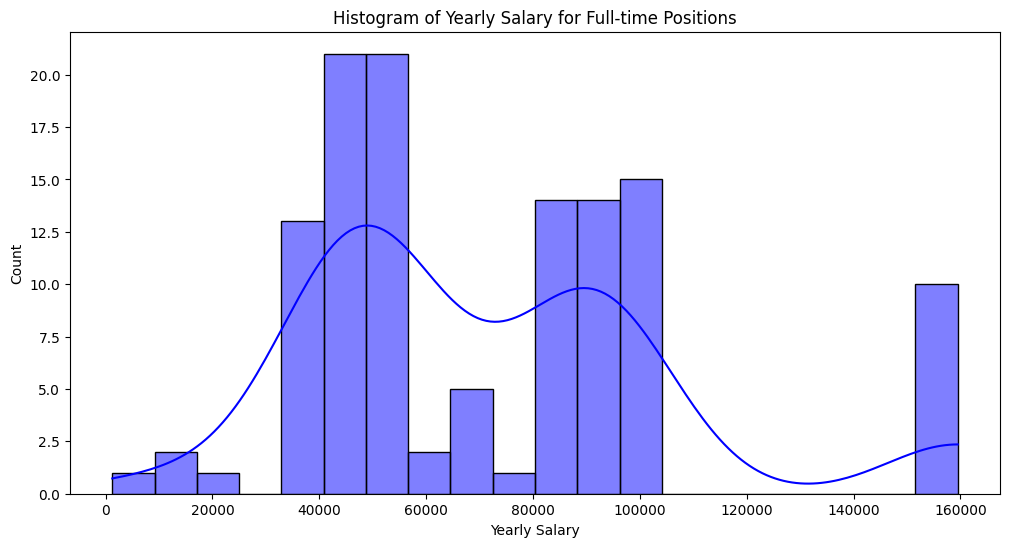

In [11]:
# Histogram
plt.figure(figsize=(12, 6))
sns.histplot(df_filtered['salary_standardized'], kde=True, bins=20, color='blue')
plt.title('Histogram of Yearly Salary for Full-time Positions')
plt.xlabel('Yearly Salary')
plt.show()

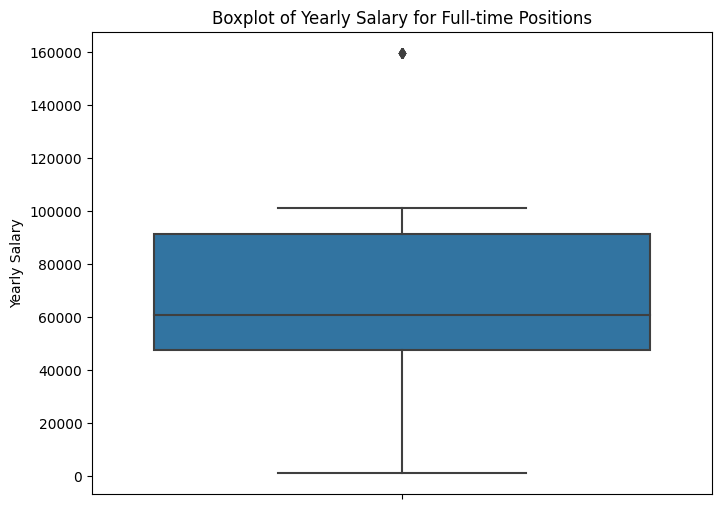

In [12]:
# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_filtered, y='salary_standardized')
plt.title('Boxplot of Yearly Salary for Full-time Positions')
plt.ylabel('Yearly Salary')
plt.show()


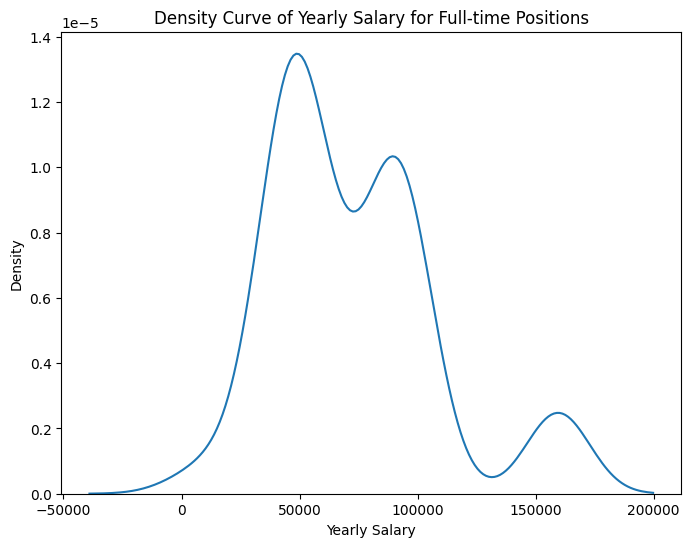

In [13]:
# Density curve
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df_filtered, x='salary_standardized')
plt.title('Density Curve of Yearly Salary for Full-time Positions')
plt.xlabel('Yearly Salary')
plt.ylabel('Density')
plt.show()


In [14]:
# Group by 'employment_type' and calculate the mean and median salary
df_grouped = df_filtered.groupby('employment_type').agg({'salary_standardized': ['mean', 'median']})
df_grouped.columns = ['mean_salary', 'median_salary']
df_grouped = df_grouped.reset_index()
df_grouped

,employment_type,mean_salary,median_salary
0,Full-time,72201.081633,55000.0
1,Full-time and Contractor,1252.000000,1252.0
2,Full-time and Internship,35324.000000,13463.0
3,Full-time and Temp work,84159.722222,85375.0
